# Introduction
In this project we'll be building models that can predict the outcomes of whether or not a passenger in the titanic can survive or not base on other data provided

## Project Scope
We'll look at some of the information provided on this data...

Here are some questions that will be answered which will help us prepare the data for machine learning models
- Is the `Pclass` of a passenger a factor of survival?
- Are females more likely to survive than males?
- Are younger individuals more likely to survive?
- Is the cabin where an individual is a factor of survival?
- Is there a relationship between the cabin a passenger is and the place where he/she embarked?
- Are Fare price, cabin and place where a passenger embarked related?


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Analysis

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that so far we got 3 columns that have missing data; `Cabin`, `Age` and `Embarked` with `Cabin` having the most missing data

In [6]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Missing data

In [48]:
# How many percent of our data is missing

total_missing = np.sum(train.isna().sum())
total_data = np.dot(train.shape[0], train.shape[1])

percent_missing = (total_missing) *100 / total_data
print(f"Percentage of missing data {round(percent_missing, 2)}%")

Percentage of missing data 8.1%


### Age column
The age column seems to be missing 177 values, giving the circumstances in which the data was collected we can say that the data we missing at random (MAR) i.e there may be some reason as to why it's missing. Now the real question, should we drop the missing data or impute the values? The best approach is to impute the missing values using some strategies.

In [49]:
prop = train.Age.isna().sum() *100/ len(train)
round(prop, 2)
# About 20% of the ages are missing

19.87

In [50]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Let's fill in our missing data with respect to the `Pclass` feature by getting the mean age for each class and imputing it.

In [51]:
version1_list = []

for class_ in train.Pclass.unique():
    data = train.Age[train.Pclass == class_]
    data = data.fillna(data.mean())
    for value in zip(data.index, data):
        version1_list.append(value)
    

new_age = pd.DataFrame(version1_list, columns=["index", "Age"]).\
sort_values(by="index", ascending=True).set_index("index")

In [52]:
train['Age'] = new_age
train.Age.head(10)

0    22.00000
1    38.00000
2    26.00000
3    35.00000
4    35.00000
5    25.14062
6    54.00000
7     2.00000
8    27.00000
9    14.00000
Name: Age, dtype: float64

We're now done with the `Age` feature now remaining the `Cabin` and `Embarked` features

In [53]:
train.Embarked.isna().sum()

2

The `Embarked` columns seems to have only 2 missing values for which we can say they're missing completely at random maybe due to some mistake or some other unknown factor. In this case well just use a simple imputer to replace the missing values with the most frequent since it's a categorical variable. 

In [54]:
from sklearn.impute import SimpleImputer as SI

# initialize the simple imputer
imputer = SI(strategy="most_frequent")

# convert our data to 2-d array
embarked = train[['Embarked']]

imputed_embarked = imputer.fit_transform(embarked)

train['Embarked'] = imputed_embarked

train.Embarked.isna().sum()

0

Now for the `Cabin` feature; <br>
this feature seems a bit more complicated to impute as compared to the rest of the features. We can't impute it without first performing some EDA and data cleaning so let's start by first figuring out how much data is missing.

In [55]:
missing = train.Cabin.isna().sum()
missing * 100/len(train)

77.10437710437711

Seems that about 77% of the data is missing, so was it missing completely at random (MCAR)? Or was it just Missing At Random (MAR)? Well it's safer to assume that the data was missing at random i.e. it's missing for an unknown reason, but before we go on imputing the values let's first clean the column

In [58]:
train['Deck'] = train.Cabin[train.Cabin.notnull()].apply(lambda x: str(x)[0])

deck_counts = train.Deck.value_counts()
deck_counts

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Deck, dtype: int64

Looks cleaner now, so are the missing values part of these Decks? Or are they all part of a new Deck that isn't listed above? To answer this question we need to perform some EDA

In [140]:
train[train.Cabin.isna()].Pclass.value_counts()

3    479
2    168
1     40
Name: Pclass, dtype: int64

According to the internet the titanic has 10 decks but even in the internet only seven were mentioned (all the decks excluding T) and here we only got eight which has only one person init.It would be better to aggrigate that the `T` deck with our new value that we're about to make.

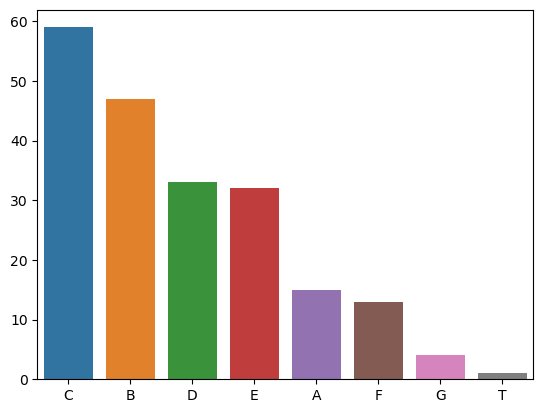

In [66]:

sns.barplot(x=deck_counts.index, y=deck_counts.values)
plt.show()


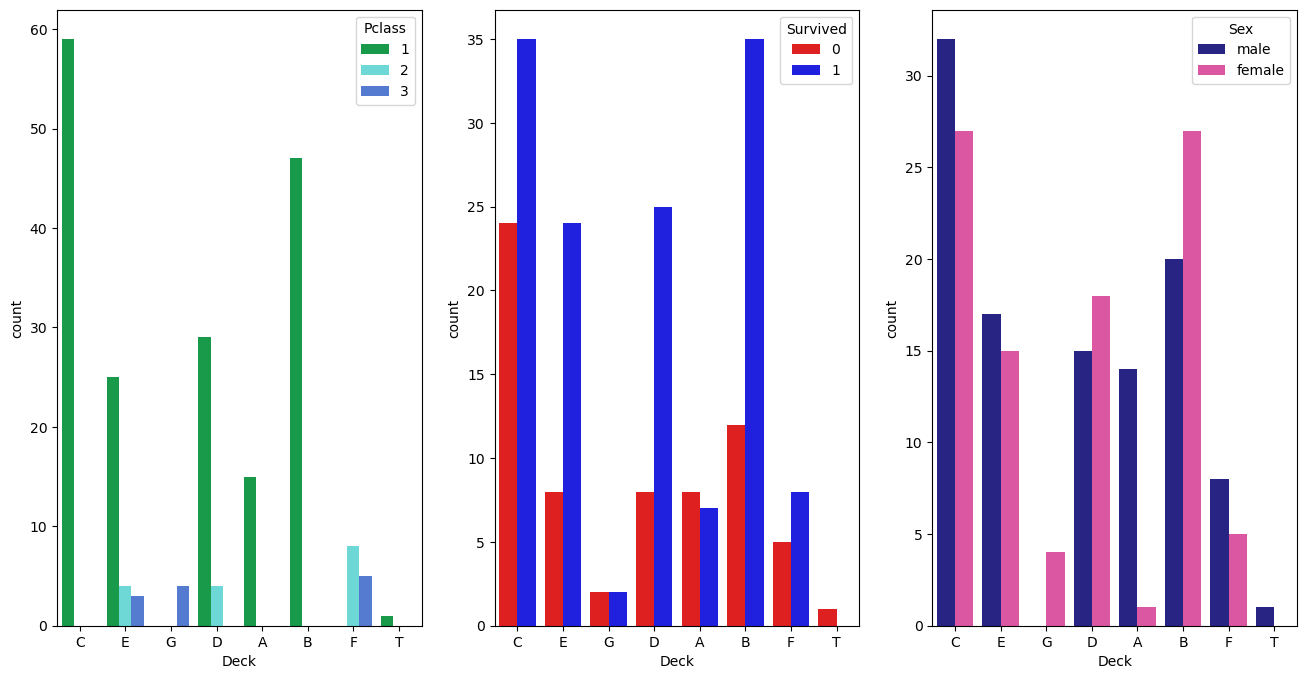

In [107]:
features = ['Pclass', "Survived", "Sex"]
# let's make our plot more descriptive
palette = [
    {1: "#04AF46", 2: "#5CEAE8", 3: "#3F73E5"},
    {0: "red", 1: "blue"},
    {"male": "#181494", "female": "#F141A5"},
]

plt.figure(figsize=(16, 8))
for i, feature in enumerate(features, start=1):
    ax = plt.subplot(1, 3, i)
    sns.countplot(data=train, x="Deck", hue=feature, palette=palette[i-1])

plt.show()

This graph is good when it comes to depicting how many people are in each category, but it's a bit diffcult to read and understand, best option would be to plot a stacked bar chart so that we can know the proportion of each category in each deck

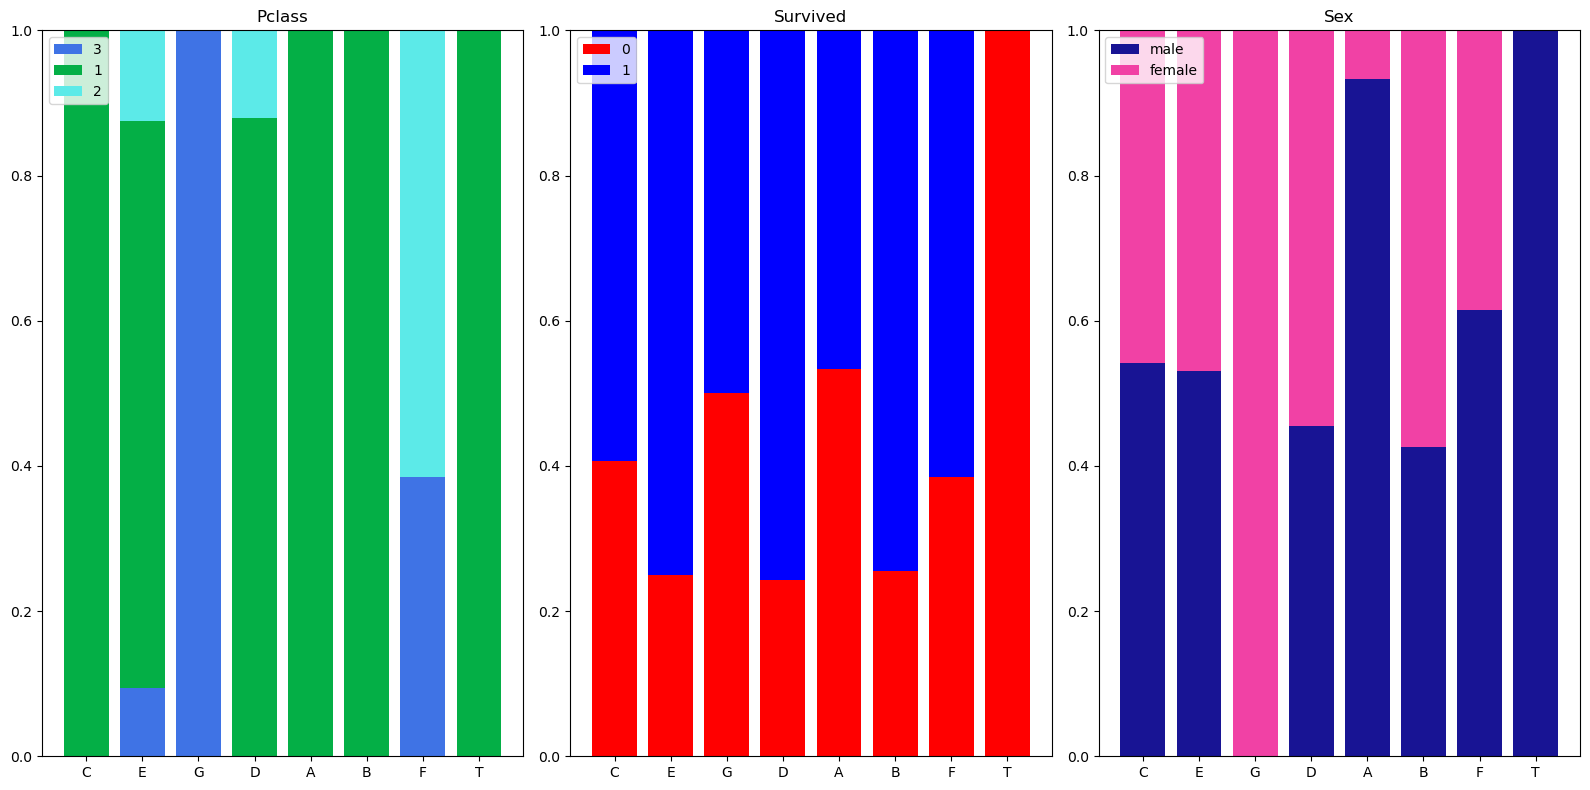

In [141]:
# Task: For each deck get the counts, and for each feature get the proportion of each category in each
# deck and plot a stacked bar chart to visualize.
decks = list(train.Deck.unique())[1:]
features = ['Pclass', "Survived", "Sex"]

plt.figure(figsize=(16, 8))
for i, feature in enumerate(features, start=1):
    plt.subplot(1, 3, i)
    total = len([train.Deck[train.Deck == deck] for deck in decks])
    len_unique = len(train[feature].unique())
    bottom = [0] * len(decks)

    for i2, values in enumerate(train[feature].unique()):
        index = train[feature].unique()[(i2)% len_unique]
        proportion = [
            train.Deck[(train.Deck == deck) & (train[feature] == index)].count()
            / len(train.Deck[train.Deck == deck]) 
            for deck in decks 
        ]
        plt.bar(decks, proportion, bottom=bottom, label=f"{values}", color=palette[i-1][values])
        bottom = np.array(bottom) + np.array(proportion)
    plt.title(str(feature))
    plt.legend(loc=2)

plt.tight_layout()
plt.show()